## First, run this cell to set up paths and import dependencies

In [1]:
import os

import matplotlib.pyplot as plt

from tqdm import tqdm

if not os.path.exists("./notebooks"):
    %cd ..

from src.data_processing import load_audio, split_into_clips, create_spectrogram, prepare_datasets, list_audio_files
from src.dataset_analysis import plot_spectrogram, print_duration_summary, dataset_durations, statistics, clips_statistics
from src.config import VALID_ACCESS_LABELS, TRAIN_DIR, TEST_DIR, VAL_DIR, DATA_DIR, DATASET_DIR

# Ensure the output directory structure exists
os.makedirs(DATASET_DIR, exist_ok=True)
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(VAL_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)


/home/borys/.virtualenvs/iml/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/borys/Studies/ML/iml


## 1. Load all .wav files in the provided directory and preview some

In [2]:
wav_files = list_audio_files(DATA_DIR)
print(f"Found {len(wav_files)} .wav files in directory '{DATA_DIR}'")

Found 100 .wav files in directory './data'


## 2. Statistics about authorized/unauthorized speakers

In [3]:
authorized_speakers_files = []
unauthorized_speakers_files = []

for file in wav_files:
    speaker_id = os.path.split(file)[-1].split('_')[0]
    if speaker_id in VALID_ACCESS_LABELS:
        authorized_speakers_files.append(file)
    else:
        unauthorized_speakers_files.append(file)

print("Authorized speakers recordings:")
durations = dataset_durations(authorized_speakers_files)
print_duration_summary(durations)

print("\nUnauthorized speakers recordings:")
durations = dataset_durations(unauthorized_speakers_files)
print_duration_summary(durations)

Authorized speakers recordings:
Total files: 30
Total duration: 4978.07 sec
Average duration: 165.94 sec
Duration range: 132.03 - 198.58 sec

Unauthorized speakers recordings:
Total files: 70
Total duration: 11118.22 sec
Average duration: 158.83 sec
Duration range: 116.16 - 224.20 sec


## 3. Split files into train, validation, and test sets

In [4]:
train_files, val_files, test_files = prepare_datasets(DATA_DIR)
print(f"Training files: {len(train_files)} | Validation files: {len(val_files)} | Test files: {len(test_files)}")

def save_spectrogram(spectrogram, output_path):
    plt.imsave(output_path, spectrogram, cmap='gray')


Training files: 64 | Validation files: 16 | Test files: 20


## 4. Calculate and display statistics about raw dataset

In [5]:
print("\nDataset Statistics:")
print("Training set:")
print(statistics(train_files))

print("Validation set:")
print(statistics(val_files))

print("Test set:")
print(statistics(train_files))


Dataset Statistics:
Training set:
Statstics:
        Total files: 64,
        Total duration: 10380.07 sec,
        Average duration: 162.19 sec, 
        Duration range: 120.83 - 120.83 sec
        
Validation set:
Statstics:
        Total files: 16,
        Total duration: 2510.62 sec,
        Average duration: 156.91 sec, 
        Duration range: 116.16 - 116.16 sec
        
Test set:
Statstics:
        Total files: 64,
        Total duration: 10380.07 sec,
        Average duration: 162.19 sec, 
        Duration range: 120.83 - 120.83 sec
        


## 5. Process each dataset split by converting 3-second clips into spectrograms

In [6]:
def process_split(file_list, output_subdir):
    for file_path in tqdm(file_list, desc=f"Processing {output_subdir}"):
        audio, sr = load_audio(file_path)
        clips = split_into_clips(audio, sample_rate=sr)
        for i, clip in enumerate(clips):
            spectrogram = create_spectrogram(clip, sr)
            output_path = os.path.join(output_subdir, f"{os.path.basename(file_path).split('.')[0]}_{i}_clip.png")
            save_spectrogram(spectrogram, output_path)
    print(clips_statistics(clips,sr))

print("Preprocessed Train Dataset:")
process_split(train_files, TRAIN_DIR)

print("\nPreprocessed Validation Dataset:")
process_split(val_files, VAL_DIR)

print("\nPreprocessed Test Dataset:")
process_split(test_files, TEST_DIR)


Preprocessed Train Dataset:


Processing ./datasets/train/: 100%|██████████| 64/64 [00:52<00:00,  1.22it/s]


Statstics:
        Total files: 44,
        Total duration: 132.00 sec,
        Average duration: 3.00 sec, 
        Duration range: 3.00 - 3.00 sec
        

Preprocessed Validation Dataset:


Processing ./datasets/val/: 100%|██████████| 16/16 [00:12<00:00,  1.28it/s]


Statstics:
        Total files: 55,
        Total duration: 165.00 sec,
        Average duration: 3.00 sec, 
        Duration range: 3.00 - 3.00 sec
        

Preprocessed Test Dataset:


Processing ./datasets/test/: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]

Statstics:
        Total files: 56,
        Total duration: 168.00 sec,
        Average duration: 3.00 sec, 
        Duration range: 3.00 - 3.00 sec
        


## 6. Visualize some spectrogram examples

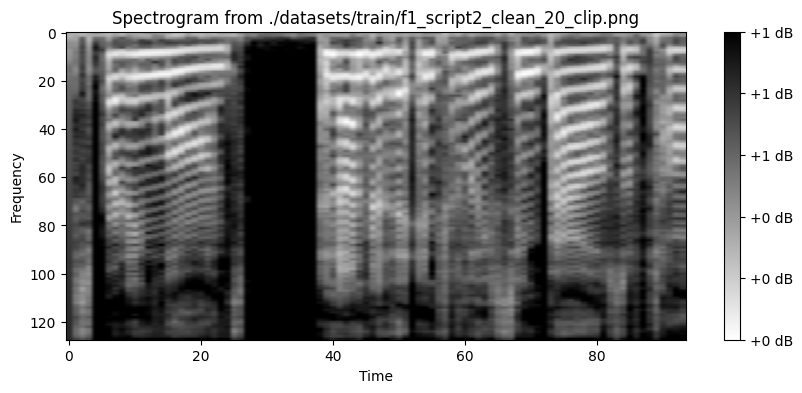

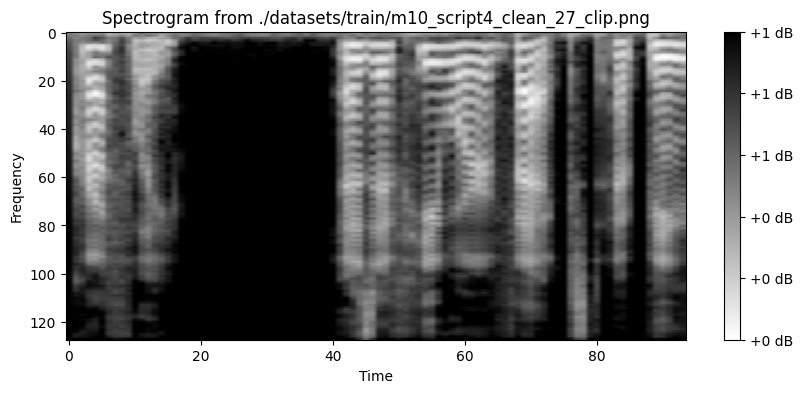

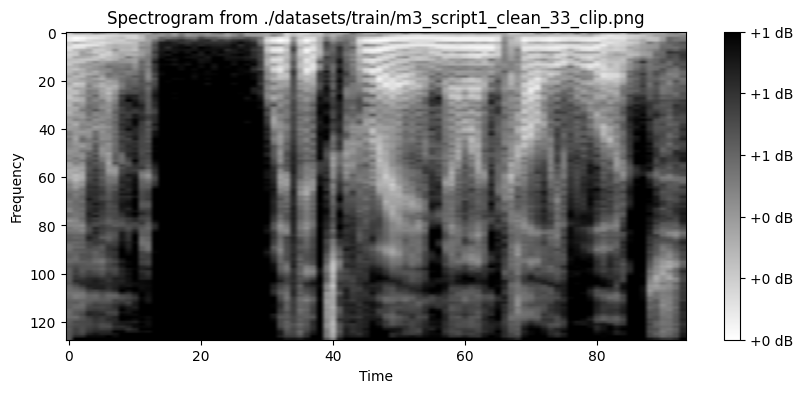

In [7]:
sample_spectrogram_paths = [os.path.join(TRAIN_DIR, f) for f in os.listdir(TRAIN_DIR)[:3]]
for path in sample_spectrogram_paths:
    spectrogram = plt.imread(path)
    plot_spectrogram(spectrogram, title=f"Spectrogram from {path}")